In [1]:
import wandb
import logging

from tqdm import tqdm
from wandb.sdk.wandb_run import Run
import numpy as np
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
from nn_core.common import PROJECT_ROOT

/home/donato/miniconda3/envs/tvp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from tvp.utils.plots import Palette

palette = Palette(f"{PROJECT_ROOT}/misc/palette.json")

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
    }
)

pylogger = logging.getLogger(__name__)
palette

{'light red': '#c05761',
 'green': '#2a9d8f',
 'yellow': '#e9c46a',
 'dark blue': '#264653',
 'red': '#941c2f',
 'orange': '#e76f51',
 'violet': '#734f5a',
 'light orange': '#f4a261'}

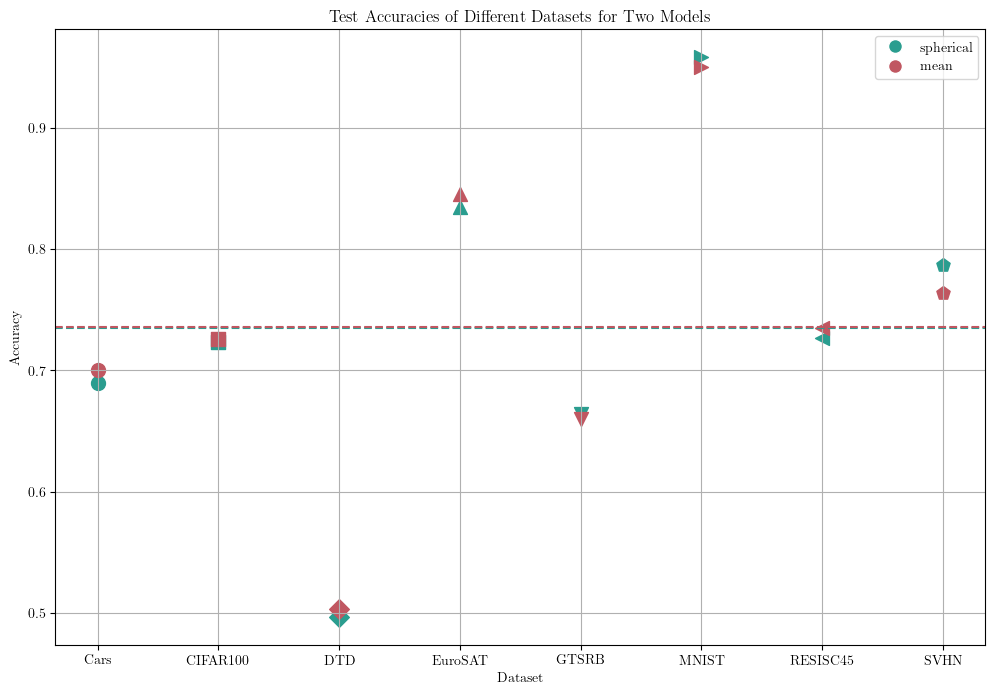

In [18]:
import matplotlib.pyplot as plt

# Data for the first model
approach_one_data = {
    'Cars': 0.6894664764404297,
    'CIFAR100': 0.7228999733924866,
    'DTD': 0.4964539110660553,
    'EuroSAT': 0.8348610997200012,
    'GTSRB': 0.6641330122947693,
    'MNIST': 0.9581000208854675,
    'RESISC45': 0.7265079617500305,
    'SVHN': 0.7866856455802917
}

approach_two_data = {'Cars': 0.7001616954803467,
 'CIFAR100': 0.7254999876022339,
 'DTD': 0.5035461187362671,
 'EuroSAT': 0.8450462818145752,
 'GTSRB': 0.6596991419792175,
 'MNIST': 0.9501000046730042,
 'RESISC45': 0.7350793480873108,
 'SVHN': 0.763905942440033}

approach_one = 'spherical'
approach_two = 'mean'

# Symbols for each dataset
symbols = ['o', 's', 'D', '^', 'v', '>', '<', 'p']

# Plotting
plt.figure(figsize=(12, 8))

# Plot data for model 1
for (dataset, accuracy), symbol in zip(approach_one_data.items(), symbols):
    plt.scatter(dataset, accuracy, marker=symbol, s=100, color=palette['green'])

# Plot data for model 2
for (dataset, accuracy), symbol in zip(approach_two_data.items(), symbols):
    plt.scatter(dataset, accuracy, marker=symbol, s=100, color=palette['light red'])

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Test Accuracies of Different Datasets for Two Models')

# plot mean acc
plt.axhline(y=np.mean(list(approach_one_data.values())), color=palette['green'], linestyle='--', label=f'{approach_one} mean')
plt.axhline(y=np.mean(list(approach_two_data.values())), color=palette['light red'], linestyle='--', label=f'{approach_two} mean')

# Create custom legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['green'], markersize=10, label=approach_one)
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['light red'], markersize=10, label=approach_two)
plt.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.grid(True)

# Show plot
plt.show()
